# <font color=Darkgreen>Telecom Churn Case Study

## <font color=purple>Filtering out the warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')

## <font color=purple>Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

## <font color=purple>Import data: telecom_churn_data
    
**Note:- Please change the reading directory of the dataset as per your requirement.**   
 
 
> - **telecom_churn_data.csv** as current file name 

In [5]:
churn = pd.read_csv(r'C:\Users\gohel\OneDrive\Desktop\UpGrad\Courses\Portal Files\Course 3 - Tree Models\Module 8 - Telecom Churn Case Study(Advance Machine learning)\telecom_churn_data.csv')
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

## <font color=purple>Understand the Data

In [6]:
# Check the number of rows and columns in the dataframe

churn.shape

(99999, 226)

In [7]:
# Checking the size of the dataframe

churn.size

22599774

In [8]:
# Checking data type of the dataframe

churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [9]:
# Checking the summuary in the dataframe

churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

## <font color=purple>Preparing the Data

In [10]:
# checking the null values in the dataframe

round(churn.isnull().sum()*100/churn.shape[0],2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [11]:
# Defining a Missing value cutoff

def MissingValues(cutoff):
    missing_data = round(100*(churn.isnull().sum()/churn.shape[0]))
    return missing_data.loc[missing_data > cutoff]

In [12]:
MissingValues(50)

date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
total_rech_data_6           75.0
total_rech_data_7           74.0
total_rech_data_8           74.0
total_rech_data_9           74.0
max_rech_data_6             75.0
max_rech_data_7             74.0
max_rech_data_8             74.0
max_rech_data_9             74.0
count_rech_2g_6             75.0
count_rech_2g_7             74.0
count_rech_2g_8             74.0
count_rech_2g_9             74.0
count_rech_3g_6             75.0
count_rech_3g_7             74.0
count_rech_3g_8             74.0
count_rech_3g_9             74.0
av_rech_amt_data_6          75.0
av_rech_amt_data_7          74.0
av_rech_amt_data_8          74.0
av_rech_amt_data_9          74.0
arpu_3g_6                   75.0
arpu_3g_7                   74.0
arpu_3g_8                   74.0
arpu_3g_9                   74.0
arpu_2g_6                   75.0
arpu_2g_7                   74.0
arpu_2g_8 

#### <font color=Green>Approach:
<font color=Blue> --> **We can see that ,there are 40 features having more than 50% missing values.**

### <font color=purple>Imputing missing values

#### <font color=Green>Approach:
<font color=Blue> --> **Based on the data, there are some columns that are important for pulling high value customer information, which is why missing value is imputed with zero.**

In [13]:
def impute_missing(data,Col=False,missingCol=False):
    if Col:
        for col in [y + s for s in ['_6','_7','_8','_9'] for y in Col]:
            data[col].fillna(0, inplace=True)
    else:    
        for col in missingCol:
            data[col].fillna(0, inplace=True)

In [14]:
impute = ['count_rech_3g', 'max_rech_data', 'night_pck_user', 'count_rech_2g', 'av_rech_amt_data',
             'arpu_2g', 'total_rech_data','fb_user','arpu_3g']

In [15]:
impute_missing(churn,impute)

In [16]:
# Checking again the missing values

MissingValues(50)

date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
dtype: float64

In [17]:
# Dropping the columns having missing values more than 50%

missingvalue_columns = list(MissingValues(50).index)

In [18]:
churn.drop(missingvalue_columns,axis=1,inplace=True)

In [19]:
# Checking again the missing values

MissingValues(5)

onnet_mou_9         8.0
offnet_mou_9        8.0
roam_ic_mou_9       8.0
roam_og_mou_9       8.0
loc_og_t2t_mou_9    8.0
loc_og_t2m_mou_9    8.0
loc_og_t2f_mou_9    8.0
loc_og_t2c_mou_9    8.0
loc_og_mou_9        8.0
std_og_t2t_mou_9    8.0
std_og_t2m_mou_9    8.0
std_og_t2f_mou_9    8.0
std_og_t2c_mou_9    8.0
std_og_mou_9        8.0
isd_og_mou_9        8.0
spl_og_mou_9        8.0
og_others_9         8.0
loc_ic_t2t_mou_9    8.0
loc_ic_t2m_mou_9    8.0
loc_ic_t2f_mou_9    8.0
loc_ic_mou_9        8.0
std_ic_t2t_mou_9    8.0
std_ic_t2m_mou_9    8.0
std_ic_t2f_mou_9    8.0
std_ic_t2o_mou_9    8.0
std_ic_mou_9        8.0
spl_ic_mou_9        8.0
isd_ic_mou_9        8.0
ic_others_9         8.0
dtype: float64

In [20]:
# Checking if all columns for the month of September (9) are missing

missing_column = list(MissingValues(5).index)
churn[churn[missing_column].isnull().all(axis=1)][missing_column].head()

,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_og_t2f_mou_9,std_og_t2c_mou_9,std_og_mou_9,isd_og_mou_9,spl_og_mou_9,og_others_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### <font color=Green>Approach:
<font color=Blue> --> **It appears that all the columns of sept month_9 are missing, so we can substitute zero for these.**

In [21]:
impute_missing(churn,missingCol=missing_column)
churn=churn[~churn[missing_column].isnull().all(axis=1)]

In [22]:
# Check the number of rows and columns in the dataframe

churn.shape

(99999, 222)

In [23]:
# Checking again the missing values

MissingValues(2)

onnet_mou_6            4.0
onnet_mou_7            4.0
onnet_mou_8            5.0
offnet_mou_6           4.0
offnet_mou_7           4.0
offnet_mou_8           5.0
roam_ic_mou_6          4.0
roam_ic_mou_7          4.0
roam_ic_mou_8          5.0
roam_og_mou_6          4.0
roam_og_mou_7          4.0
roam_og_mou_8          5.0
loc_og_t2t_mou_6       4.0
loc_og_t2t_mou_7       4.0
loc_og_t2t_mou_8       5.0
loc_og_t2m_mou_6       4.0
loc_og_t2m_mou_7       4.0
loc_og_t2m_mou_8       5.0
loc_og_t2f_mou_6       4.0
loc_og_t2f_mou_7       4.0
loc_og_t2f_mou_8       5.0
loc_og_t2c_mou_6       4.0
loc_og_t2c_mou_7       4.0
loc_og_t2c_mou_8       5.0
loc_og_mou_6           4.0
loc_og_mou_7           4.0
loc_og_mou_8           5.0
std_og_t2t_mou_6       4.0
std_og_t2t_mou_7       4.0
std_og_t2t_mou_8       5.0
std_og_t2m_mou_6       4.0
std_og_t2m_mou_7       4.0
std_og_t2m_mou_8       5.0
std_og_t2f_mou_6       4.0
std_og_t2f_mou_7       4.0
std_og_t2f_mou_8       5.0
std_og_t2c_mou_6       4.0
s

In [24]:
missing_column=list(MissingValues(2).index)
churn[churn[missing_column].isnull().all(axis=1)][missing_column].head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,date_of_last_rech_8,date_of_last_rech_9
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Dropping the columns as it is not useful

churn = churn[~churn[missing_column].isnull().all(axis=1)]

In [26]:
# Check the number of rows and columns in the dataframe

churn.shape

(99618, 222)

In [27]:
# Removing the unuseful data from the dataset

missing_column.remove('date_of_last_rech_8')
missing_column.remove('date_of_last_rech_9')
impute_missing(churn,missingCol=missing_column)

In [28]:
# Checking again the missing values

MissingValues(0)

loc_og_t2o_mou          1.0
std_og_t2o_mou          1.0
loc_ic_t2o_mou          1.0
last_date_of_month_8    1.0
last_date_of_month_9    1.0
date_of_last_rech_6     1.0
date_of_last_rech_7     1.0
date_of_last_rech_8     3.0
date_of_last_rech_9     4.0
dtype: float64

In [29]:
column = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']

In [30]:
column = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']
for i in column: 
    print(i,churn[i].unique())

loc_og_t2o_mou [ 0. nan]
std_og_t2o_mou [ 0. nan]
loc_ic_t2o_mou [ 0. nan]
last_date_of_month_7 ['7/31/2014' nan]
last_date_of_month_8 ['8/31/2014' nan]
last_date_of_month_9 ['9/30/2014' nan]
date_of_last_rech_7 ['7/16/2014' '7/31/2014' '7/24/2014' '7/28/2014' '7/17/2014' '7/25/2014'
 '7/23/2014' '7/5/2014' '7/10/2014' '7/22/2014' '7/30/2014' '7/3/2014'
 '7/7/2014' '7/29/2014' '7/27/2014' '7/19/2014' '7/14/2014' '7/20/2014'
 '7/4/2014' '7/12/2014' nan '7/26/2014' '7/11/2014' '7/6/2014' '7/21/2014'
 '7/13/2014' '7/15/2014' '7/18/2014' '7/9/2014' '7/2/2014' '7/8/2014'
 '7/1/2014']
date_of_last_rech_8 ['8/8/2014' '8/28/2014' '8/14/2014' '8/31/2014' '8/9/2014' '8/24/2014'
 '8/26/2014' '8/30/2014' '8/29/2014' '8/27/2014' '8/21/2014' '8/10/2014'
 '8/25/2014' '8/19/2014' '8/22/2014' '8/2/2014' '8/13/2014' '8/5/2014'
 '8/18/2014' '8/20/2014' '8/23/2014' '8/12/2014' '8/11/2014' '8/16/2014'
 '8/15/2014' '8/6/2014' nan '8/17/2014' '8/7/2014' '8/1/2014' '8/4/2014'
 '8/3/2014']
date_of_last_rech_9 

In [31]:
# For this columns we will impute the missing values with the mode value

column=['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']
for i in column:
    print(churn[i].value_counts())
    churn[i].fillna(churn[i].mode()[0], inplace=True)

0.0    98981
Name: loc_og_t2o_mou, dtype: int64
0.0    98981
Name: std_og_t2o_mou, dtype: int64
0.0    98981
Name: loc_ic_t2o_mou, dtype: int64
7/31/2014    99300
Name: last_date_of_month_7, dtype: int64
8/31/2014    98867
Name: last_date_of_month_8, dtype: int64
9/30/2014    98321
Name: last_date_of_month_9, dtype: int64


In [32]:
# Checking again the missing values

MissingValues(0)

date_of_last_rech_6    1.0
date_of_last_rech_7    1.0
date_of_last_rech_8    3.0
date_of_last_rech_9    4.0
dtype: float64

#### <font color=Green>Approach:
<font color=Blue> --> **We see that there are four features that have missing values greater than 0%, and these features are missing together.**

In [33]:
missing_column = list(MissingValues(0).index)

In [34]:
churn[churn['date_of_last_rech_6'].isnull()]['date_of_last_rech_6'] = '6/30/2014'
churn[churn['date_of_last_rech_7'].isnull()]['date_of_last_rech_7'] = '7/31/2014'
churn[churn['date_of_last_rech_8'].isnull()]['date_of_last_rech_8'] = '8/31/2014'
churn[churn['date_of_last_rech_9'].isnull()]['date_of_last_rech_9'] = '9/30/2014'

In [35]:
# Finding the columns with the zero value

columns_zero = churn.columns[(churn == 0).all()]

In [36]:
# Removing the columns with zero values

churn.drop(columns_zero,axis=1,inplace=True)

In [37]:
churn.reset_index(inplace=True,drop=True)

In [38]:
# list of all columns which store date
date_col = list(churn.filter(regex='date').columns)

In [39]:
date_col

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [40]:
# Convert the date column with date_time format

for col in date_col:
    churn[col] = pd.to_datetime(churn[col], format='%m/%d/%Y')

In [41]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99618 entries, 0 to 99617
Columns: 211 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](8), float64(168), int64(35)
memory usage: 160.4 MB


In [42]:
# Renaming the column according to the requirement

churn.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8',
                      'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)

In [43]:
# Creating the new feature

for i in range(6,10):
    churn['vol_data_mb_'+str(i)] = (churn['vol_2g_mb_'+str(i)] + churn['vol_3g_mb_'+str(i)]).astype(int)

#### <font color=Green>Approach:
<font color=Blue> --> **Thus we create new features namely 'vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8', 'vol_data_mb_9'.**

### <font color=purple>Filtering High Value Customers

#### >>>> <font color=Green> **Customers recharged with an amount greater than the 70th percentile of average recharge amount in the first two months (the good phase).**

In [44]:
recharge_col = churn.filter(regex=('count')).columns
churn[recharge_col].head()

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### <font color=Green>Approach:
<font color=Blue> --> **Create new feature: avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,avg_rech_amt_9.**
    
<font color=Blue> --> **For each customer, the average recharge value will be stored each month.**

In [45]:
for i in range(6,10):
    churn['avg_rech_amt_'+str(i)] = round(churn['total_rech_amt_'+str(i)]/churn['total_rech_num_'+str(i)]+1,2)

In [46]:
impute_missing(churn,missingCol=['avg_rech_amt_6','avg_rech_amt_7','avg_rech_amt_8','avg_rech_amt_9'])

#### <font color=Green>Approach:
<font color=Blue> --> **Create new feature: total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_num_data_9.**
    
<font color=Blue> --> **For each customer, the total number of data recharge (=count_rech_2g + count_rech_3g ) for each month.**

In [47]:
for i in range(6,10):
    churn['total_rech_num_data_'+str(i)] = (churn['count_rech_2g_'+str(i)]+churn['count_rech_3g_'+str(i)]).astype(int)

#### <font color=Green>Approach:
<font color=Blue> --> **Create new feature: total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9.**
    
<font color=Blue> --> **For each customer, the  total amount of data recharge (=total_rech_num_data * av_rech_amt_data ) for each month.**

In [48]:
for i in range(6,10):
    churn['total_rech_amt_data_'+str(i)] = churn['total_rech_num_data_'+str(i)]*churn['av_rech_amt_data_'+str(i)]

#### <font color=Green>Approach:
<font color=Blue> --> **Create new feature: total_month_rech_6,total_month_rech_7,total_month_rech_8,total_month_rech_9.**
    
<font color=Blue> --> **For each customer, the total the total recharge amount (= total_rech_amt + total_rech_amt_data ) for each customer, for each month.**

In [49]:
for i in range(6,10):
    churn['total_month_rech_'+str(i)] = churn['total_rech_amt_'+str(i)]+churn['total_rech_amt_data_'+str(i)]
churn.filter(regex=('total_month_rech')).head()

,total_month_rech_6,total_month_rech_7,total_month_rech_8,total_month_rech_9
0,614.0,504.0,504.0,0.0
1,74.0,538.0,383.0,121.0
2,168.0,315.0,116.0,404.0
3,230.0,310.0,601.0,410.0
4,252.0,350.0,287.0,200.0


In [50]:
# Calculating the average of the first two months (good phase)

goodphase_avg =(churn.total_month_rech_6 + churn.total_month_rech_7)/2
goodphase_avg

0         559.0
1         306.0
2         241.5
3         270.0
4         301.0
          ...  
99613      85.0
99614     110.0
99615      98.5
99616    1602.0
99617     432.0
Length: 99618, dtype: float64

In [51]:
# Let's take the 70th percentile of good phase recharge amounts as the cutoff

higher_value_cutoff = np.percentile(goodphase_avg,70)

In [52]:
# look at the 70th percentile recharge amount

print("Recharge amount at 70th percentile: {0}".format(higher_value_cutoff))

Recharge amount at 70th percentile: 479.5


#### >>>> <font color=Green> **Customer with good phase and average reharge amount >=70th percentile is filtered further.**

In [53]:
high_value_users = churn[goodphase_avg>=higher_value_cutoff]
high_value_users.reset_index(inplace=True,drop=True)

In [54]:
len(high_value_users)

29906

#### <font color=Green>Approach:
<font color=Blue> --> **In total, 29906 high value users are present in the data set.**

In [55]:
# Percentage of the high value users in the dataset

print("Percentage of high value users: {0}%".format(round(len(high_value_users)/churn.shape[0]*100)))

Percentage of high value users: 30%


### <font color=purple>Tag churners and remove attributes of the churn phase

#### >>>> <font color=Green> **Now tag the churned customers (churn=1, else 0) based on the fourth month as follows:**

<font color=Green> --> **Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:** <font color=red> <br><br>- **total_ic_mou_9** <font color=red> <br><br>- **total_og_mou_9** <font color=red> <br><br>- **vol_2g_mb_9** <font color=red> <br><br>- **vol_3g_mb_9**

In [56]:
def churnstatus(data,churnMonth=9):
    churn_data_features = ['vol_2g_mb_','vol_3g_mb_','total_ic_mou_','total_og_mou_']
    flag= ~data[[a + str(churnMonth) for a in churn_data_features ]].any(axis=1)
    flag= flag.map({True:1, False:0})
    return flag

In [57]:
high_value_users['churn'] = churnstatus(high_value_users,9)

#### >>>> <font color=Green> **Finding Tagged churners from high_value_users.**

In [58]:
(len(high_value_users[high_value_users.churn == 1]))

2418

#### <font color=Green>Approach:
<font color=Blue> --> **In total, there are 2418 high value users having churned tag.**

In [59]:
# Percentage of the high value churn

print("Percentage of high value churn: {0}%".format((round(len(high_value_users[high_value_users.churn == 1])/high_value_users.shape[0] *100,2))))

Percentage of high value churn: 8.09%


#### <font color=Green>Approach:
<font color=Blue> --> **The data shows a highly imbalanced data set, with 8.09% of the data coming from churners, compared to 91.91% from non-churners.**

#### >>>> <font color=Green> **Removing all the attributes corresponding to the churn phase (all attributes having ‘ _9’ in their names).**


In [60]:
column_9 = high_value_users.filter(regex=('_9')).columns
high_value_users.drop(column_9,axis=1,inplace=True)

## <font color=purple>Exploratory Data Analysis

In [61]:
# Common column list for month 6

common_columns = high_value_users.filter(regex ='_6').columns
common_columns

Index(['last_date_of_month_6', 'arpu_6', 'onnet_mou_6', 'offnet_mou_6',
       'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6',
       'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6',
       'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6',
       'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6',
       'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6',
       'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6',
       'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6',
       'date_of_last_rech_6', 'last_day_rch_amt_6', 'total_rech_data_6',
       'max_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6',
       'av_rech_amt_data_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'arpu_3g_6',
       'arpu_2g_6', 'night_pck_user_6', 'monthly_2g_6', 'sachet_2g_6',
       'monthly_3g_6', 'sachet_3g_6', '

In [62]:
# Common Monthly column list for month 6

month_columns = [item.strip('_6') for item in common_columns]
month_columns

['last_date_of_month',
 'arpu',
 'onnet_mou',
 'offnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'loc_og_t2t_mou',
 'loc_og_t2m_mou',
 'loc_og_t2f_mou',
 'loc_og_t2c_mou',
 'loc_og_mou',
 'std_og_t2t_mou',
 'std_og_t2m_mou',
 'std_og_t2f_mou',
 'std_og_mou',
 'isd_og_mou',
 'spl_og_mou',
 'og_others',
 'total_og_mou',
 'loc_ic_t2t_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2f_mou',
 'loc_ic_mou',
 'std_ic_t2t_mou',
 'std_ic_t2m_mou',
 'std_ic_t2f_mou',
 'std_ic_mou',
 'total_ic_mou',
 'spl_ic_mou',
 'isd_ic_mou',
 'ic_others',
 'total_rech_num',
 'total_rech_amt',
 'max_rech_amt',
 'date_of_last_rech',
 'last_day_rch_amt',
 'total_rech_data',
 'max_rech_data',
 'count_rech_2g',
 'count_rech_3g',
 'av_rech_amt_data',
 'vol_2g_mb',
 'vol_3g_mb',
 'arpu_3g',
 'arpu_2g',
 'night_pck_user',
 'monthly_2g',
 'sachet_2g',
 'monthly_3g',
 'sachet_3g',
 'fb_user',
 'vbc_3g',
 'vol_data_mb',
 'avg_rech_amt',
 'total_rech_num_data',
 'total_rech_amt_data',
 'total_month_rech']

In [63]:
# Monthly column list for months 6,7,8

all_month_columns = [y + z for z in ['_6','_7','_8'] for y in month_columns]
all_month_columns

['last_date_of_month_6',
 'arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'date_of_last_rech_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'fb_user_6',
 'vbc_3g_6',
 'vol_data_mb_6',
 'avg_rech_

In [64]:
# List of non-montlhy Columns:

non_month_columns = [col for col in high_value_users.columns if col not in all_month_columns]
non_month_columns

['mobile_number', 'circle_id', 'aon', 'churn']

In [65]:
# Distinct circle_id's:

high_value_users.circle_id.value_counts()

109    29906
Name: circle_id, dtype: int64

#### <font color=Green>Approach:
<font color=Blue> --> **This dataset only contains one circle_id 109 and we can remove it moving forward since it is not contributing to analysis and model building.**

In [66]:
# Dropping the 'circle_id' column

high_value_users.drop('circle_id',axis=1,inplace=True)

In [67]:
# Defining a function to plot a histogram:

def histogram(dataset,col,binsize):
    fig, ax = plt.subplots(figsize=(18,5))
    counts, bins, patches = ax.hist(dataset[col],bins=range(0,dataset[col].max(),round(binsize)))
    
    # Set the ticks to be at the edges of the bins.
    ax.set_xticks(bins)
    bin_centers = 0.5 * np.diff(bins) + bins[:-1]
    for count, x in zip(counts, bin_centers):
        # Label the percentages
        percent = '%0.0f%%' % (100 * float(count) / counts.sum())
        ax.annotate(percent, xy=(x,0.2), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')
    
    ax.set_xlabel(col.upper())
    ax.set_ylabel('Count')
    
    plt.show()

count    29906.000000
mean      1209.062396
std        957.342718
min        180.000000
25%        460.000000
50%        846.000000
75%       1755.000000
max       4321.000000
Name: aon, dtype: float64


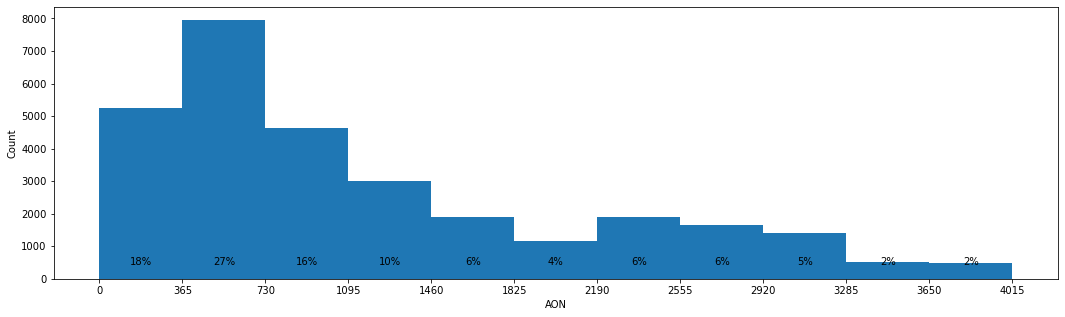

In [68]:
print(high_value_users.aon.describe())
histogram(high_value_users,'aon',365)
plt.show()

#### <font color=Green>Approach:
<font color=Blue> --> **A little over two thirds of the High_Value_users are already using it for two years.**

<font color=Blue> --> **Approximately 15% of customers have been on the same network for 7 years or more.**
    
<font color=Blue> --> **Customer spending on a network averages around 1200 days, which adds up to approx. 3.3 years.**
    
<font color=Blue> --> **Minimum usage by any customer is 180 days.**


In [69]:
# Creating Derived categorical variable:

high_value_users['aon_bin'] = pd.cut(churn['aon'], range(0,churn['aon'].max(),365), labels=range(0,int(round(churn['aon'].max()/365))-1))

In [70]:
# Defining a function to plot Churn:

def plot_Churn(data,col):
    
    fig, ax = plt.subplots(figsize=(9,6))
    col_list=list(data.filter(regex=(col)).columns)
    col_list = col_list[:3]
    plt.plot(high_value_users.groupby('churn')[col_list].mean().T)
    ax.set_xticklabels(['Jun','Jul','Aug'])
    plt.legend(['Non-Churn', 'Churn_data'])
    plt.title( str(col) + ' V/S Month', loc='center', fontsize=15, fontweight=2, color='Blue')
    plt.xlabel('Month')
    plt.ylabel(col)
    plt.show()
    return high_value_users.groupby('churn')[col_list].mean()

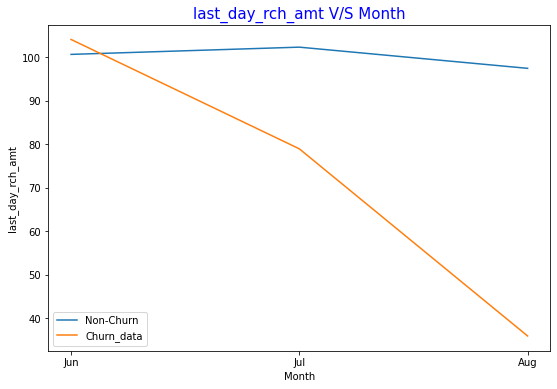

,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8
churn,,,
0,100.657232,102.318284,97.451724
1,104.085194,78.956989,35.955749


In [71]:
# Plotting last_day_rch_amt VS Month

plot_Churn(high_value_users,'last_day_rch_amt')

#### <font color=Green>Approach:
<font color=Blue> --> **According to the data and graph, the average last recharge amount for churners is considerably lower than that for non-churners.**

<font color=Blue> --> **Consequently, if the recharge amount decreases, the churn rate will rise.**

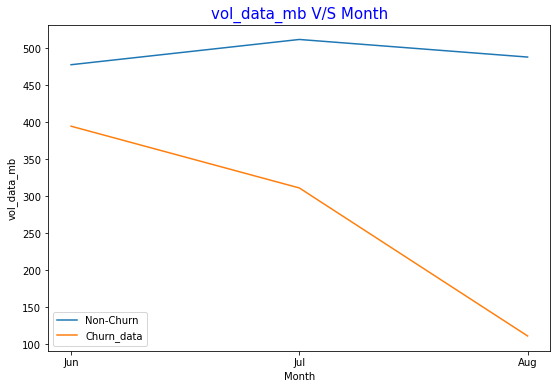

,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8
churn,,,
0,478.037762,512.164072,488.389661
1,394.949545,311.507444,111.469396


In [72]:
# Plotting vol_data_mb VS Month

plot_Churn(high_value_users,'vol_data_mb')

#### <font color=Green>Approach:
<font color=Blue> --> **There is some consistency and similarity in the volume of data usage for non-churners, whereas the volume of data usage (mb) dramatically drops for churners.**

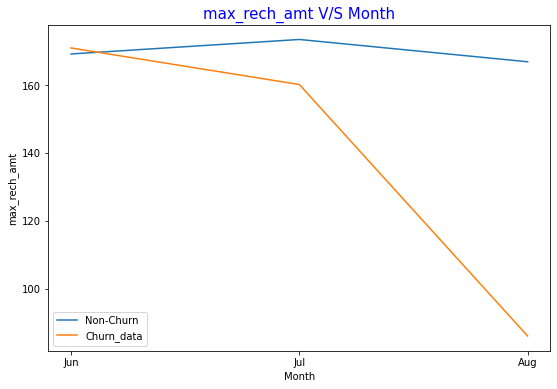

,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8
churn,,,
0,169.160943,173.437282,166.865250
1,170.930108,160.152192,86.026468


In [73]:
# Plotting max_rech_amt VS Month

plot_Churn(high_value_users,'max_rech_amt')

#### <font color=Green>Approach:
<font color=Blue> --> **In fact, even the maximum recharge amount drops for churners while remaining almost constant for non-churners.**

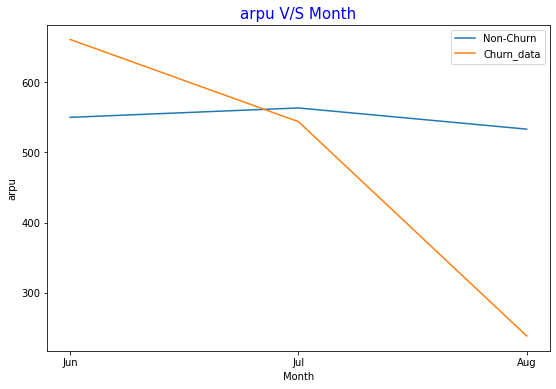

,arpu_6,arpu_7,arpu_8
churn,,,
0,549.843524,563.190828,533.052496
1,660.695411,543.722952,238.631887


In [74]:
# Plotting arpu VS Month

plot_Churn(high_value_users,'arpu')

#### <font color=Green>Approach:
<font color=Blue> --> **The arpu drops considerably for churners, while it remains constant for non-churners.**

## <font color=purple>Modelling

In [75]:
# Importing the necessary libraries

import sklearn.preprocessing
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [76]:
# Defining the model metrics

def Model_Metrics(actual_churn=False,predict_churn=False):

    confusion_metric=metrics.confusion_matrix(actual_churn, predict_churn)

    True_Pos = confusion_metric[1,1] 
    True_Neg = confusion_metric[0,0] 
    Fasle_Pos = confusion_metric[0,1] 
    Faslse_Neg = confusion_metric[1,0]
  
    print('Precision Score value: {}'.format(metrics.precision_score(actual_churn, predict_churn )))
    
    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,predict_churn)))
    
    print('Specificity: {}'.format(True_Neg / float(True_Neg+Fasle_Pos)))
    
    print('Sensitivity/Recall : {}'.format(True_Pos / float(True_Pos+Faslse_Neg)))
    
    print('Positive predictive value: {}'.format(True_Pos / float(True_Pos+Fasle_Pos)))
    
    print('Negative Predictive value: {}'.format(True_Neg / float(True_Neg+ Faslse_Neg))) 
    
    print('False Positive Rate: {}'.format(Fasle_Pos/ float(True_Neg+Fasle_Pos)))

In [77]:
# Defining optimal cut-off

def OptimalCutoff(df):
    num = [float(x)/10 for x in range(10)]
    for i in num:
        df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)
    cutoff= pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
    from sklearn.metrics import confusion_matrix
    num_1 = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num_1:
        cm_1 = metrics.confusion_matrix(df.churn, df[i] )
        total_1=sum(sum(cm_1))
        accuracy = (cm_1[0,0]+cm_1[1,1])/total_1
        speci = cm_1[0,0]/(cm_1[0,0]+cm_1[0,1])
        sensi = cm_1[1,1]/(cm_1[1,0]+cm_1[1,1])
        cutoff.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff)
    cutoff.plot.line(x='prob',y=['accuracy','sensitivity','specificity'])
    plt.show()

In [78]:
# Defining a function for predicting churn with probability

def predictChurnWithProb(model,X,y,prob):
    pred_probs = model.predict_proba(X)[:,1]   
    ydf= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    ydf['final_predicted'] =ydf.churn_Prob.map( lambda x: 1 if x > prob else 0)
    Model_Metrics(ydf.churn,ydf.final_predicted)
    return ydf

#### >>>> <font color=Green> **Creating a copy of high_value_users dataframe for PCA Analysis**

In [79]:
# Creating a copy of high_value_users dataframe

PCA_high_value_users = high_value_users.copy()

In [80]:
# Removing the unnecessary columns

PCA_high_value_users.drop(['mobile_number','aon_bin'],axis=1,inplace=True)

In [81]:
# Removing the datatime columns before PCA

date_time_column = list(PCA_high_value_users.select_dtypes(include=['datetime64']).columns)
PCA_high_value_users.drop(date_time_column, axis=1, inplace=True)

In [82]:
print(date_time_column)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [83]:
PCA_high_value_users.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_month_rech_6,total_month_rech_7,total_month_rech_8,churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,113,152,115,91.50,85.00,127.00,1,1,1,252.0,252.0,252.0,614.0,504.0,504.0,1
1,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0

## <font color=purple>Train And Test Split

In [84]:
from sklearn.model_selection import train_test_split

X= PCA_high_value_users.drop(['churn'], axis=1)
y= PCA_high_value_users['churn']    

X_train,X_test, y_train,y_test= train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [85]:
# Rescalling the features

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [86]:
# Fitting the scaler on X_train dataset using fit_transform method

X_train= scaler.fit_transform(X_train)

In [87]:
# Fitting the scaler on X_test using transform method

X_test= scaler.transform(X_test)

## <font color=purple>Handling Class Imbalance

In [88]:
# Counts of non_churn data before oversampling

print("non_churn data before oversampling: {}".format(sum(y_train==0)))

non_churn data before oversampling: 19234


In [89]:
# Counts of churn data before oversampling

print("churn data before oversampling: {}".format(sum(y_train==1)))

churn data before oversampling: 1700


In [90]:
# churn_rate before oversampling

print("churn_rate before oversampling: {}".format(round(sum(y_train==1)/len(y_train)*100,2)))

churn_rate before oversampling: 8.12


### >>>> <font color=Green> **Using the SMOTE oversampling technique for balancing the imbalance data**

In [91]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12,sampling_strategy=1)
X_train_res, y_train_res=sm.fit_resample(X_train,y_train)

In [92]:
# Counts of non_churn data after oversampling

print("non_churn data after oversampling: {}".format(sum(y_train_res==0)))

non_churn data after oversampling: 19234


In [93]:
# Counts of churn data after oversampling

print("churn data after oversampling: {}".format(sum(y_train_res==1)))

churn data after oversampling: 19234


In [94]:
# churn_rate after oversampling

print("churn_rate after oversampling: {}".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))

churn_rate after oversampling: 50.0


### >>>> <font color=Green> **Importing the PCA Module for Analysis**

In [95]:
from sklearn.decomposition import PCA
pca= PCA(svd_solver='randomized',random_state=42)

In [96]:
# PCA on the train dataset

pca.fit(X_train_res)

PCA(random_state=42, svd_solver='randomized')

In [97]:
pca.explained_variance_ratio_[:50]

array([0.53684213, 0.11824244, 0.08283584, 0.04657992, 0.02464235,
       0.02264491, 0.01698948, 0.01637005, 0.01342403, 0.01182179,
       0.00896303, 0.00788941, 0.00621522, 0.00556386, 0.0050356 ,
       0.00420984, 0.0038475 , 0.00368575, 0.00350996, 0.00339114,
       0.00314349, 0.00302183, 0.00281661, 0.00263673, 0.00250478,
       0.00235846, 0.00218095, 0.00215734, 0.00210435, 0.00198112,
       0.00178602, 0.00163925, 0.00137543, 0.00133281, 0.00130593,
       0.00121803, 0.0011344 , 0.00099542, 0.00097213, 0.00090006,
       0.00082312, 0.00079647, 0.00075446, 0.00074091, 0.00071958,
       0.00067592, 0.00065907, 0.00063052, 0.00061472, 0.00056713])

Text(0.5, 0, 'number of components')

Text(0, 0.5, 'cumulative explained variance')

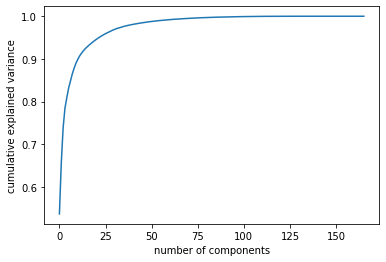

In [98]:
# Plotting the feature variance

%matplotlib inline
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### <font color=Green>Approach:
<font color=Blue> --> **It is evident that 50% of the variance is defined by 50 components. In this case, we will model our dataset based on 50 components.**

In [99]:
# Incremental PCA for efficiency

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=50)

In [100]:
X_train_pca= pca_final.fit_transform(X_train_res)

In [101]:
X_train_pca.shape

(38468, 50)

In [102]:
# Creating a correlation matrix for the principal components

corrmatrix = np.corrcoef(X_train_pca.transpose())

corrmatrix_nodiag = corrmatrix - np.diagflat(corrmatrix.diagonal())
print("max corr:",corrmatrix_nodiag.max(), ", min corr: ", corrmatrix_nodiag.min(),)

max corr: 0.02442197579386122 , min corr:  -0.05241740032262032


#### <font color=Green>Approach:
<font color=Blue> --> **It can be seen that there is no correlation between the components.**

In [103]:
# Applying the 50 selected components to the test data set

X_test_pca = pca_final.transform(X_test)

In [104]:
X_test_pca.shape

(8972, 50)

### >>>> <font color=Green> **We will try fitting various models and select the most accurate predictive model for the prediction of customer churn.**

### >>>> <font color=Green> **We will be using the following models to predict the model.**

#### <font color=magenta> 1. Logistic Regression

#### <font color=magenta> 2. Decision Tree

#### <font color=magenta> 3. Random Forest

#### <font color=magenta> 4. Support Vector Machine(SVM)

### <font color=purple> 1. Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr_0 = LogisticRegression(class_weight='balanced')

In [106]:
# Defining a function for modelfit

def model_fit(algo, X_train, y_train,perform_CV=True,CV_folds=5):
    algo.fit(X_train, y_train)
    dtrain_pred=algo.predict(X_train)
    dtrain_pred_prob=algo.predict_proba(X_train)[:,1]
    
    if perform_CV:
        CV_score =cross_val_score(algo,X_train,y_train,cv=CV_folds,scoring='roc_auc')
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_pred))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_pred))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_pred_prob))
    
    if perform_CV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(CV_score),np.std(CV_score),np.min(CV_score),np.max(CV_score)))

In [107]:
model_fit(lr_0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.8278
Recall/Sensitivity : 0.8433
AUC Score (Train): 0.902620
CV Score : Mean - 0.9014092 | Std - 0.00233883 | Min - 0.8995006 | Max - 0.9059682


In [108]:
# Predicting on test data:

pred_probs_test =lr_0.predict(X_test_pca)
Model_Metrics(y_test,pred_probs_test)

Precision Score value: 0.2821256038647343
Roc_auc_score : 0.8166682752955772
Specificity: 0.8199660770535498
Sensitivity/Recall : 0.8133704735376045
Positive predictive value: 0.2821256038647343
Negative Predictive value: 0.9805853375833092
False Positive Rate: 0.1800339229464502


In [109]:
print("Accuracy : {}".format(metrics.accuracy_score(y_test,pred_probs_test)))
print("Recall : {}".format(metrics.recall_score(y_test,pred_probs_test)))
print("Precision : {}".format(metrics.precision_score(y_test,pred_probs_test)))

Accuracy : 0.8194382523406153
Recall : 0.8133704735376045
Precision : 0.2821256038647343


In [110]:
# ROC_Score

pred_probs_train = lr_0.predict_proba(X_train_pca)[:,1]
print("roc_auc_score : {}".format((metrics.roc_auc_score(y_train_res, pred_probs_train))))

roc_auc_score : 0.9026195191180431


In [111]:
cut_off_prob=0.5
y_train_df = predictChurnWithProb(lr_0,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Precision Score value: 0.8179525970751387
Roc_auc_score : 0.8278049287719664
Specificity: 0.8123115316626807
Sensitivity/Recall : 0.843298325881252
Positive predictive value: 0.8179525970751387
Negative Predictive value: 0.8382873698894732
False Positive Rate: 0.18768846833731934


,churn,churn_Prob,final_predicted
0,0,0.774059,1
1,0,0.013963,0
2,0,0.104385,0
3,0,0.046040,0
4,0,0.813886,1


In [112]:
# Defining a function to plot ROC Curve:

def roc(actual,probs):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probs,drop_intermediate = False )
    auc_score= metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(7,7))
    plt.plot( fpr, tpr, label='ROC_Curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.xlabel('False_Positive_Rate')
    plt.ylim([0.0, 1.05])
    plt.ylabel('True Positive Rate')
    plt.title('ROC_Curve')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

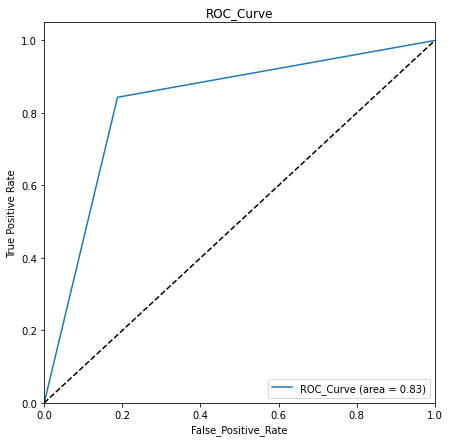

(array([0.        , 0.18768847, 1.        ]),
 array([0.        , 0.84329833, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [113]:
roc(y_train_df.churn, y_train_df.final_predicted)

#### <font color=Green>Approach:
<font color=Blue> --> **As we can see, the curve pops out towards the left top corner, which indicates a good fit.**

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.500000     1.000000     0.000000
0.1   0.1  0.676432     0.980555     0.372309
0.2   0.2  0.745581     0.956743     0.534418
0.3   0.3  0.787018     0.923989     0.650047
0.4   0.4  0.813091     0.886867     0.739316
0.5   0.5  0.827805     0.843298     0.812312
0.6   0.6  0.829105     0.781689     0.876521
0.7   0.7  0.815769     0.713736     0.917802
0.8   0.8  0.780103     0.608662     0.951544
0.9   0.9  0.597016     0.207861     0.986170


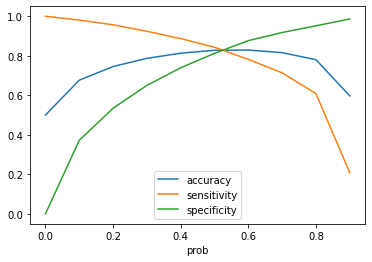

In [114]:
# Optimal Cutoff point

OptimalCutoff(y_train_df)

#### <font color=Green>Approach:
<font color=Blue> --> **According to the above graph, 0.48 is the optimal cutoff point.**

In [115]:
# Predicting on train set

cut_off_prob = 0.48
predictChurnWithProb(lr_0,X_train_pca,y_train_res,cut_off_prob)

Precision Score value: 0.8088851634534786
Roc_auc_score : 0.8256992825205365
Specificity: 0.7984818550483519
Sensitivity/Recall : 0.8529167099927212
Positive predictive value: 0.8088851634534786
Negative Predictive value: 0.844449331940397
False Positive Rate: 0.20151814495164813


,churn,churn_Prob,final_predicted
0,0,0.774059,1
1,0,0.013963,0
2,0,0.104385,0
3,0,0.046040,0
4,0,0.813886,1
...,...,...,...
38463,1,0.811119,1
38464,1,0.900339,1
38465,1,0.892376,1
38466,1,0.881507,1


In [116]:
# Let's Predict on test set

predictChurnWithProb(lr_0,X_test_pca,y_test,cut_off_prob)

Precision Score value: 0.26721014492753625
Roc_auc_score : 0.8128504251842442
Specificity: 0.8039738308698813
Sensitivity/Recall : 0.8217270194986073
Positive predictive value: 0.26721014492753625
Negative Predictive value: 0.9810762862211709
False Positive Rate: 0.19602616913011872


,churn,churn_Prob,final_predicted
4265,0,0.450463,0
29221,0,0.606366,1
974,0,0.484063,1
1602,0,0.383584,0
10225,0,0.140767,0
...,...,...,...
6262,0,0.227791,0
1424,0,0.045558,0
18308,0,0.234169,0
22978,0,0.086292,0


#### <font color=Green>Approach:
<font color=Blue> --> **After PCA and logistic regression (with optimal cutoff), the model has the right balance of metrics scores for sensitivity, specificity, and ROC accuracy.**

### <font color=brown> >>>> **We got the following values for Logistic regression model:** <br><br><font color=magenta>- roc score on test : 81.28%<br><font color=magenta> - sensitivity/Recall on test: 82.17%<br><br><font color=magenta>- roc score on train : 82.56%<br><font color=magenta>- sensitivity/Recall on train : 85.29%

### <font color=purple> 2. Decision Tree

In [117]:
dt_0 = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=10)
model_fit(dt_0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.7658
Recall/Sensitivity : 0.7484
AUC Score (Train): 0.843643
CV Score : Mean - 0.8394444 | Std - 0.007293103 | Min - 0.8280358 | Max - 0.8494917


In [118]:
# Make the prediction

pred_test = dt_0.predict(X_test_pca)

In [119]:
Model_Metrics(actual_churn=y_test,predict_churn=pred_test)

Precision Score value: 0.21240105540897097
Roc_auc_score : 0.7278581229797927
Specificity: 0.7830142960988612
Sensitivity/Recall : 0.6727019498607242
Positive predictive value: 0.21240105540897097
Negative Predictive value: 0.9649148999701403
False Positive Rate: 0.21698570390113883


In [120]:
param_grid = {
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(100, 400, 50),
    'min_samples_split': range(100, 400, 100),
    'max_features': [8,10,15]
}
dt = DecisionTreeClassifier(class_weight='balanced',random_state=10)

# Instantiate the grid search model

grid_search_cv = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1,scoring="f1_weighted",return_train_score=True)

In [121]:
# Fit the grid in data

grid_search_cv.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=10),
             n_jobs=4,
             param_grid={'max_depth': range(5, 15, 3),
                         'max_features': [8, 10, 15],
                         'min_samples_leaf': range(100, 400, 50),
                         'min_samples_split': range(100, 400, 100)},
             return_train_score=True, scoring='f1_weighted', verbose=1)

In [122]:
# Optimal accuracy score and Hyperparameters

print('Recall',grid_search_cv.best_score_,'with',grid_search_cv.best_params_)

Recall 0.8078650477168887 with {'max_depth': 11, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 100}


In [123]:
# Model with the best hyperparameters

final_dt=DecisionTreeClassifier(class_weight='balanced',max_depth=11,min_samples_leaf=100,min_samples_split=100,max_features=15,random_state=10)

In [124]:
model_fit(final_dt,X_train_pca,y_train_res)


Model Report
Accuracy : 0.8339
Recall/Sensitivity : 0.8462
AUC Score (Train): 0.912804
CV Score : Mean - 0.8886998 | Std - 0.006866857 | Min - 0.8820392 | Max - 0.9010218


In [125]:
# Predicting on test set

pred_probs_test = final_dt.predict(X_test_pca)
Model_Metrics(actual_churn=y_test,predict_churn=pred_probs_test)

Precision Score value: 0.24069598840019332
Roc_auc_score : 0.7516306772507699
Specificity: 0.8096680397383087
Sensitivity/Recall : 0.6935933147632312
Positive predictive value: 0.24069598840019332
Negative Predictive value: 0.9681297986382732
False Positive Rate: 0.1903319602616913


In [126]:
# Classification Report

print(classification_report(y_test,pred_probs_test))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      8254
           1       0.24      0.69      0.36       718

    accuracy                           0.80      8972
   macro avg       0.60      0.75      0.62      8972
weighted avg       0.91      0.80      0.84      8972



#### <font color=Green>Approach:
<font color=Blue> --> **The sesitivity/recall rate of 69.35% is obtained by tuning the decision tree with hyperparameter.**

In [127]:
# Train churn with 0.5 cutoff

cut_off_prob=0.5
y_train_df =predictChurnWithProb(final_dt,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Precision Score value: 0.8258994265996854
Roc_auc_score : 0.833913902464386
Specificity: 0.8216179681813456
Sensitivity/Recall : 0.8462098367474264
Positive predictive value: 0.8258994265996854
Negative Predictive value: 0.842332498267683
False Positive Rate: 0.17838203181865447


,churn,churn_Prob,final_predicted
0,0,0.855263,1
1,0,0.005291,0
2,0,0.020000,0
3,0,0.005291,0
4,0,0.931077,1


     prob  accuracy  sensitivity  specificity
0.0   0.0  0.607908     1.000000     0.215816
0.1   0.1  0.713502     0.992149     0.434855
0.2   0.2  0.776931     0.965634     0.588229
0.3   0.3  0.809296     0.930852     0.687740
0.4   0.4  0.828949     0.889259     0.768639
0.5   0.5  0.833914     0.846210     0.821618
0.6   0.6  0.830612     0.805449     0.855776
0.7   0.7  0.801757     0.682905     0.920609
0.8   0.8  0.777529     0.611885     0.943174
0.9   0.9  0.731439     0.497868     0.965010


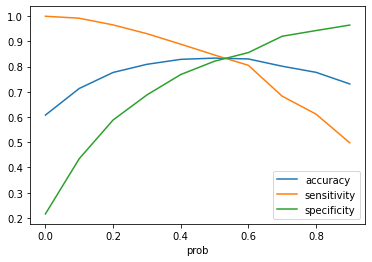

In [128]:
OptimalCutoff(y_train_df)

#### <font color=Green>Approach:
<font color=Blue> --> **According to the above graph, 0.47 is the optimal cutoff point.**

In [129]:
cut_off_prob=0.47
y_train_df =predictChurnWithProb(final_dt,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Precision Score value: 0.8184300680204558
Roc_auc_score : 0.8334459810751793
Specificity: 0.8098679421857128
Sensitivity/Recall : 0.8570240199646459
Positive predictive value: 0.8184300680204558
Negative Predictive value: 0.8499481639111693
False Positive Rate: 0.1901320578142872


,churn,churn_Prob,final_predicted
0,0,0.855263,1
1,0,0.005291,0
2,0,0.020000,0
3,0,0.005291,0
4,0,0.931077,1


In [130]:
# Predicting on test data

y_test_df= predictChurnWithProb(final_dt,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Precision Score value: 0.23470319634703196
Roc_auc_score : 0.7564121860726932
Specificity: 0.7969469348194814
Sensitivity/Recall : 0.7158774373259053
Positive predictive value: 0.23470319634703196
Negative Predictive value: 0.9699203774697729
False Positive Rate: 0.20305306518051855


,churn,churn_Prob,final_predicted
4265,0,0.026846,0
29221,0,0.037594,0
974,0,0.445026,0
1602,0,0.274510,0
10225,0,0.304435,0


#### <font color=Green>Approach:
<font color=Blue> --> **When analyzing the Decision Tree with optimal cutoff, the model ROC score and Sensitivity/Recall decline for the test data set compared to the train data set.**

### <font color=brown> >>>> **We got the following values for Decision Tree model:** <br><br><font color=magenta>- roc score on test : 75.64%<br><font color=magenta> - sensitivity/Recall on test: 71.58%<br><br><font color=magenta>- roc score on train : 83.34%<br><font color=magenta>- sensitivity/Recall on train : 85.70%

### <font color=Purple> 3. Random Forest

In [131]:
# Tunning the hyperparameter

aram_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 3),
                         'max_features': [8, 10, 15],
                         'min_samples_leaf': range(100, 400, 50),
                         'min_samples_split': range(100, 400, 100)},
             return_train_score=True, verbose=1)

In [132]:
# Optimal accuracy score and Hyperparameters

print('Recall',grid_search.best_score_,'with',grid_search.best_params_)

Recall 0.8425444746202468 with {'max_depth': 14, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 100}


In [133]:
# Model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=14,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=8,
                             n_estimators=300)

In [134]:
# Fit the model

rfc_model.fit(X_train_pca, y_train_res)

RandomForestClassifier(max_depth=14, max_features=8, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=300)

In [135]:
# Predicting on train set

y_train_pred = rfc_model.predict(X_train_pca)
Model_Metrics(actual_churn=y_train_res,predict_churn=y_train_pred)

Precision Score value: 0.8694435645655157
Roc_auc_score : 0.8638348757408756
Specificity: 0.8714256004991161
Sensitivity/Recall : 0.856244150982635
Positive predictive value: 0.8694435645655157
Negative Predictive value: 0.8583939362900748
False Positive Rate: 0.12857439950088384


In [136]:
# Predicting on test set

y_test_pred = rfc_model.predict(X_test_pca)
Model_Metrics(actual_churn=y_test,predict_churn=y_test_pred)

Precision Score value: 0.31653823355068167
Roc_auc_score : 0.8020213715912534
Specificity: 0.860310152653259
Sensitivity/Recall : 0.7437325905292479
Positive predictive value: 0.31653823355068167
Negative Predictive value: 0.9747426218256692
False Positive Rate: 0.13968984734674098


#### <font color=Green>Approach:
<font color=Blue> --> **The test set results show that the sensitivity has decreased while evaluating the model. However, the ROC score and specificity are quite good.**

### <font color=brown> >>>> **We got the following values for Random Forest:** <br><br><font color=magenta>- roc score on test : 80.25%<br><font color=magenta> - sensitivity/Recall on test: 74.51%<br><br><font color=magenta>- roc score on train : 86.33%<br><font color=magenta>- sensitivity/Recall on train : 85.57%

### <font color=Purple> 4. Support Vector Machine(SVM)

In [138]:
# Importing SVC
from sklearn.svm import SVC

In [139]:
# specify range of hyperparameters

hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model with RBF kernel

model = SVC(kernel="rbf")

In [140]:
# set up GridSearchCV()

model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = 3, 
                        verbose = 1,
                        return_train_score=True) 

In [141]:
# fit the model

model_cv.fit(X_train_pca, y_train_res) 

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [142]:
# cv results

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,46.703975,3.682322,29.421921,0.319009,1,0.01,"{'C': 1, 'gamma': 0.01}",0.786789,0.785386,0.787007,0.786394,0.000718,8,0.786625,0.789043,0.784645,0.786771,0.001798
1,50.742923,2.078152,33.076896,0.988672,1,0.001,"{'C': 1, 'gamma': 0.001}",0.689620,0.684005,0.683357,0.685661,0.002812,10,0.684188,0.686099,0.686150,0.685479,0.000913
2,68.640199,2.456671,47.883165,0.269945,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.686891,0.683147,0.683201,0.684413,0.001752,12,0.683252,0.685202,0.685097,0.684517,0.000895
3,36.891498,0.313201,23.159300,2.285007,10,0.01,"{'C': 10, 'gamma': 0.01}",0.820323,0.818841,0.823039,0.820734,0.001738,4,0.822578,0.822266,0.821025,0.821956,0.000671
4,43.508834,2.141865,27.581856,0.478140,10,0.001,"{'C': 10, 'gamma': 0.001}",0.787101,0.785152,0.786695,0.786316,0.000840,9,0.787249,0.788692,0.784567,0.786836,0.001709
5,49.481799,0.073661,36.725614,2.309917,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.689620,0.684005,0.683357,0.685661,0.002812,10,0.684188,0.686099,0.686150,0.685479,0.000913
6,33.722017,1.157123,19.764566,1.254545,100,0.01,"{'C': 100, 'gamma': 0.01}",0.829525,0.830305,0.835907,0.831912,0.002843,2,0.835874,0.832755,0.831904,0.833511,0.001707
7,34.739973,2.733201,21.663943,0.548452,100,0.001,"{'C': 100, 'gamma': 0.001}",0.818373,0.817593,0.822649,0.819538,0.002222,6,0.821603,0.820901,0.819309,0.820604,0.000960
8,84.759458,3.303787,80.912082,3.063825,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.787257,0.785308,0.786773,0.786446,0.000829,7,0.787366,0.788770,0.784645,0.786927,0.001712
9,49.624614,9.364727,25.923011,6.241928,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.836700,0.837947,0.843862,0.839503,0.003124,1,0.844960,0.841412,0.841964,0.842778,0.001559


In [143]:
# Printing the best score 

best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.8395030768180091 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


In [144]:
# Model with optimal hyperparameters

svm_pca_model = SVC(C=1000, gamma=0.001, kernel="rbf")

svm_pca_model.fit(X_train_pca, y_train_res)

SVC(C=1000, gamma=0.001)

In [145]:
# Predictions on the train set

y_train_pred = svm_pca_model.predict(X_train_pca)
Model_Metrics(actual_churn=y_train_res,predict_churn=y_train_pred)

Precision Score value: 0.8430266902959025
Roc_auc_score : 0.832094208173027
Specificity: 0.8480295310387855
Sensitivity/Recall : 0.8161588853072684
Positive predictive value: 0.8430266902959025
Negative Predictive value: 0.8218370534589611
False Positive Rate: 0.15197046896121452


In [146]:
# Predicting on test set

y_test_pred = svm_pca_model.predict(X_test_pca)
Model_Metrics(actual_churn=y_test,predict_churn=y_test_pred)

Precision Score value: 0.3158482142857143
Roc_auc_score : 0.8198833957773829
Specificity: 0.8514659559001696
Sensitivity/Recall : 0.7883008356545961
Positive predictive value: 0.3158482142857143
Negative Predictive value: 0.9788300835654596
False Positive Rate: 0.1485340440998304


#### <font color=Green>Approach:
<font color=Blue> --> **When evaluating the model, the test set results show a decline in sensitivity. However, the ROC score and specificity are quite good.**

### <font color=brown> >>>> **We got the following values for Support Vector Machine(SVM):** <br><br><font color=magenta>- roc score on test : 76.03%<br><font color=magenta> - sensitivity/Recall on test: 70.61%<br><br><font color=magenta>- roc score on train : 84.10%<br><font color=magenta>- sensitivity/Recall on train : 85.09%

# <font color=Green>Recommendations:
### <font color=brown> >> **Considering our business problems, we need higher recall to retain customers. The cost of providing an offer to a non-churning customer is less than the cost of loosing a customer and bringing in a new one, so we need to identify the true positives with high accuracy.**
### <font color=brown> >> **The Logistic regression and Random forest are the best performing models among the rest based on ROC score and recall value with 81.3% and 80.3% respectively for the test dataset. So we will use Logistic regression and Random forest for the analysis.**
### <font color=brown> >> **Considering the high rates of STD, ISD, and roaming, telecom companies must pay attention to these rates in order to prevent the customers from transferring, and they should provide some helpful offers or packages to stop this from happening.**
### <font color=brown> >> **As a solution to the problem, it would be helpful if telecom companies collected customer query and complaint data and tailored their services accordingly.**